# The Hacker News API 
Let’s make an API call that returns the IDs of the current top articles 
on Hacker News, and then examine each of the top articles

_Import necessary Requests_

In [1]:
import requests

from operator import itemgetter

_Make an API call and store the response_

In [2]:
url = 'https://hacker-news.firebaseio.com/v0/topstories.json'
r = requests.get(url)
print(f"Status code: {r.status_code}")

Status code: 200


_Process information about each submission_

In [4]:
submission_ids = r.json()
submission_dicts = []
for submission_id in submission_ids[:30]:
    url = f"https://hacker-news.firebaseio.com/v0/item/{submission_id}.json"
    submission_r = requests.get(url)
    print(f"id: {submission_r.json()['id']}")
    print(f"title: {submission_r.json()['title']}")
    print(f"url: {submission_r.json().get('url', 'No URL')}")
    print(f"comments: {submission_r.json().get('descendants', 0)}")
    submission_dict = {
        'title': submission_r.json()['title'],
        'link': submission_r.json().get('url', f"https://news.ycombinator.com/item?id={submission_r.json()['id']}"),
        'comments': submission_r.json().get('descendants', 0)
    }
    submission_dicts.append(submission_dict)
submission_dicts = sorted(submission_dicts, key=itemgetter('comments'), reverse=True)

for submission_dict in submission_dicts:
    print(f"\nTitle: {submission_dict['title']}")
    print(f"Discussion link: {submission_dict['link']}")
    print(f"Comments: {submission_dict['comments']}")

id: 42821741
title: To make electricity cheaper and greener, connect the world's grids
url: https://www.economist.com/leaders/2025/01/23/to-make-electricity-cheaper-and-greener-connect-the-worlds-grids
comments: 26
id: 42821457
title: Show HN: I built a DIY plane spotting system at home
url: https://pilane.obviy.us/
comments: 2
id: 42821519
title: Pixelfed Hit 500K Users
url: https://fedidb.org/software/pixelfed
comments: 7
id: 42810293
title: How far can you get in 40 minutes from each subway station in NYC?
url: https://subwaysheds.com/#11.27/40.7427/-73.9869
comments: 45
id: 42789670
title: I got OpenAI o1 to play the boardgame Codenames and it's super good
url: https://suveenellawela.com/thoughts/codenames-ai
comments: 44
id: 42808038
title: How to build your own ZX80/ZX81 (2019)
url: http://searle.x10host.com/zx80/zx80.html
comments: 9
id: 42803774
title: An overview of gradient descent optimization algorithms (2016)
url: https://www.ruder.io/optimizing-gradient-descent/
comments:

_Visualize the data using Matplotlib_

id: 42839348
title: Sweden Seizes Ship Suspected of Baltic Sea 'Sabotage'
url: https://www.barrons.com/news/sweden-says-has-seized-ship-suspected-of-baltic-sea-sabotage-13ff82f2
comments: 58
id: 42838355
title: Show HN: Making AR experiences is still painful – had to make my own editor
url: https://ordinary.space/
comments: 14
id: 42817260
title: Hackers get $886,250 for 49 zero-days at Pwn2Own Automotive 2025
url: https://www.bleepingcomputer.com/news/security/hackers-get-886-250-for-49-zero-days-at-pwn2own-automotive-2025/
comments: 37
id: 42837636
title: Hedy: Textual programming made easy
url: https://www.hedy.org/
comments: 25
id: 42839650
title: Nvidia, ASML Plunge as DeepSeek Triggers Tech Stock Selloff
url: https://finance.yahoo.com/news/asml-sinks-china-ai-startup-081823609.html
comments: 110
id: 42835772
title: Openhaystack: Build 'AirTags' – track Bluetooth devices via Apple's network
url: https://github.com/seemoo-lab/openhaystack
comments: 63
id: 42839253
title: Free Web H

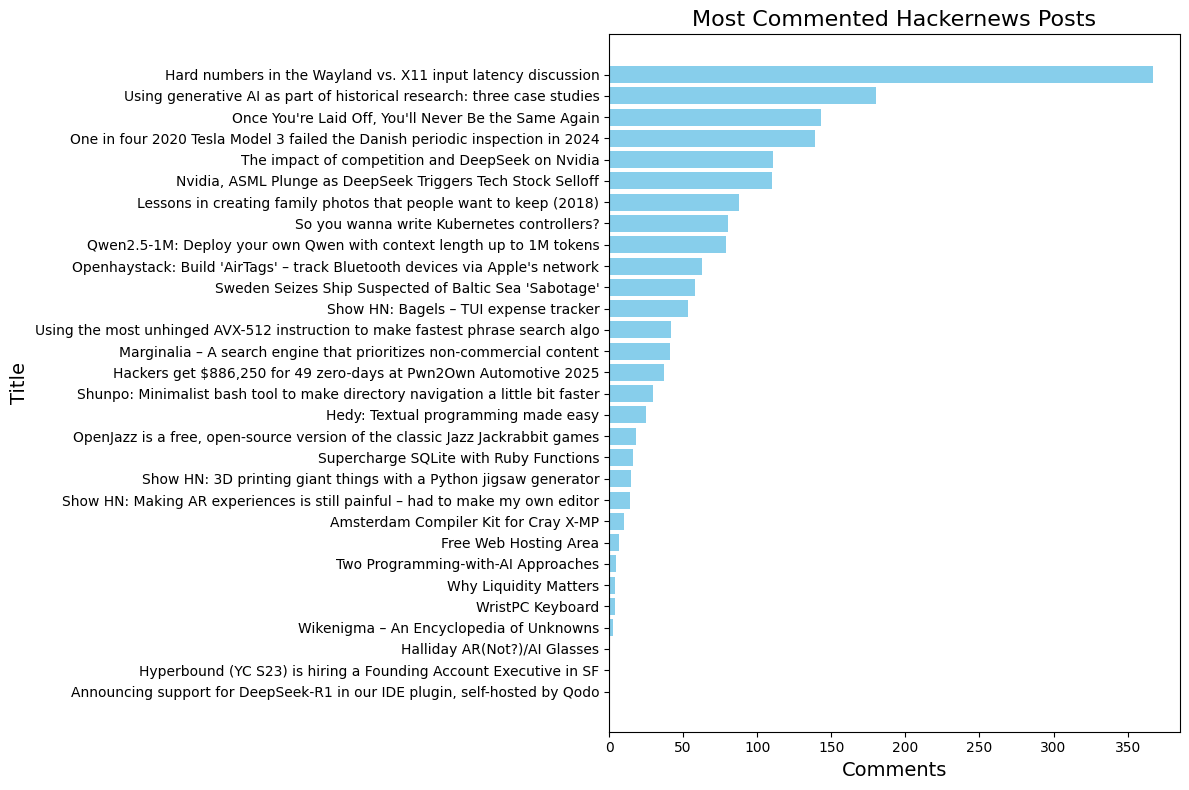

In [1]:
import requests
import matplotlib.pyplot as plt
from operator import itemgetter

# Make an HTTP request to get the submission IDs
url = "https://hacker-news.firebaseio.com/v0/topstories.json"
r = requests.get(url)
submission_ids = r.json()

submission_dicts = []

for submission_id in submission_ids[:30]:
    url = f"https://hacker-news.firebaseio.com/v0/item/{submission_id}.json"
    submission_r = requests.get(url)
    submission_data = submission_r.json()
    print(f"id: {submission_data['id']}")
    print(f"title: {submission_data['title']}")
    print(f"url: {submission_data.get('url', 'No URL')}")
    print(f"comments: {submission_data.get('descendants', 0)}")
    submission_dict = {
        'title': submission_data['title'],
        'link': submission_data.get('url', f"https://news.ycombinator.com/item?id={submission_data['id']}"),
        'comments': submission_data.get('descendants', 0)
    }
    submission_dicts.append(submission_dict)

submission_dicts = sorted(submission_dicts, key=itemgetter('comments'), reverse=True)

for submission_dict in submission_dicts:
    print(f"\nTitle: {submission_dict['title']}")
    print(f"Discussion link: {submission_dict['link']}")
    print(f"Comments: {submission_dict['comments']}")


# Extract titles and comments for plotting
titles = [submission_dict['title'] for submission_dict in submission_dicts]
comments = [submission_dict['comments'] for submission_dict in submission_dicts]

# Create the bar chart using Matplotlib.
plt.figure(figsize=(12, 8))
plt.barh(titles, comments, color='skyblue')
plt.xlabel('Comments', fontsize=14)
plt.ylabel('Title', fontsize=14)
plt.title('Most Commented Hackernews Posts', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest stars at the top
plt.tight_layout()

# Display the plot.
plt.show()